In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
%matplotlib inline

### Initial Exploration of Data

In [49]:
national_covid_df = pd.read_csv('nation_level_daily.csv')

In [50]:
national_covid_df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [172]:
fig = px.line(x=national_covid_df.Date, y=national_covid_df["Total Confirmed"])
fig.update_xaxes(
    ticktext=["First Case", "Present"],
    tickvals=["30-Jan-2020", national_covid_df.index.max()],
)
fig.update_layout(
    yaxis=dict(title_text="Total Confirmed Cases"),)
fig.show()

In [179]:
national_covid_df["MA"] = national_covid_df["Daily Deceased"].rolling(window=7).mean()

fig = px.line(x=national_covid_df.Date, y=national_covid_df["MA"])
fig.update_xaxes(
    ticktext=["First death"],
    tickvals=["12-Mar-2020"],
)
fig.update_layout(
    yaxis=dict(title_text="Daily covid-19 deaths"),)
fig.show()

We can see that the trend line is steeping up! We will try to map nifty 50 index and see how it works. 

In [52]:
nifty50_df = pd.read_csv('data.csv')

In [53]:
nifty50_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,01-Feb-2020,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
3,03-Feb-2020,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
4,04-Feb-2020,11786.25,11986.15,11783.40,11979.65,560430291,22338.50


In [225]:
import plotly.io as pio
pio.templates.default = "plotly_white"
fig = px.line(x=nifty50_df.Date, y=nifty50_df.Close)
fig.update_xaxes(
    ticktext=["1", "2"],
    tickvals=["09-Mar-2020", "24-Mar-2020"],
)
fig.update_layout(
    yaxis=dict(title_text="NIFTY50"),)
fig.show()

we will now superimpose these two plots to see if covid and nifty50 has any realtion.

In order to superimpose the two graphs we need to make sure that we take the same dates from both the data frames. There were days when stock market was closed but unfortunately covid-19 has not taken any pause.

### Data Cleaning

In [55]:
national_covid_df.Date

0       30 January 
1       31 January 
2      01 February 
3      02 February 
4      03 February 
           ...     
139        17 June 
140        18 June 
141        19 June 
142        20 June 
143        21 June 
Name: Date, Length: 144, dtype: object

In [56]:
nifty50_df.Date

0     30-Jan-2020
1     31-Jan-2020
2     01-Feb-2020
3     03-Feb-2020
4     04-Feb-2020
         ...     
90    15-Jun-2020
91    16-Jun-2020
92    17-Jun-2020
93    18-Jun-2020
94    19-Jun-2020
Name: Date, Length: 95, dtype: object

We need to modify `national_covid_df` to match with `nifty50_df` Date column. Then we can do an inner join.

In [57]:
def func_to_modify_date(x):
    x = x.split(" ")
    x[1] = x[1][0:3]
    x[2] = "2020"
    return "-".join(x)

national_covid_df.Date = national_covid_df.Date.apply(lambda x : func_to_modify_date(x))

In [58]:
national_covid_df.Date

0      30-Jan-2020
1      31-Jan-2020
2      01-Feb-2020
3      02-Feb-2020
4      03-Feb-2020
          ...     
139    17-Jun-2020
140    18-Jun-2020
141    19-Jun-2020
142    20-Jun-2020
143    21-Jun-2020
Name: Date, Length: 144, dtype: object

Great! Now we have both the data frames in the same data format.

In [59]:
merged_df = pd.merge(national_covid_df, nifty50_df, how='inner' ,on="Date")
merged_df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,1,1,0,0,0,0,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,0,1,0,0,0,0,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,01-Feb-2020,0,1,0,0,0,0,11939.00,12017.35,11633.30,11661.85,537634767,20598.12
3,03-Feb-2020,1,3,0,0,0,0,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
4,04-Feb-2020,0,3,0,0,0,0,11786.25,11986.15,11783.40,11979.65,560430291,22338.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,15-Jun-2020,10032,343075,10639,180324,396,9918,9919.35,9943.35,9726.35,9813.70,716053036,31926.65
91,16-Jun-2020,11086,354161,7226,187550,2004,11922,10014.80,10046.15,9728.50,9914.00,899895044,36257.89
92,17-Jun-2020,13108,367269,6890,194440,341,12263,9876.70,10003.60,9833.80,9881.15,685418390,30700.69
93,18-Jun-2020,13829,381098,10741,205181,343,12606,9863.25,10111.20,9845.05,10091.65,622895963,28594.32


Great now the shape of the above df matches the length of `nifty50_df`

In [260]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=merged_df.Date, y=merged_df.Close),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=merged_df.Date, y=merged_df["Daily Deceased"]),
    row=3, col=1
)

fig.update_layout(height=600, width=600, title_text="Nifty50 vs Daily Confirmed India")
fig.show()

In [263]:
from scipy.stats import kurtosis 
kurtosis(merged_df["Total Confirmed"], fisher = True)

1.4598467125499903

This is really interesting, it seems that Indian markets were not reacting with daily confirmed cases in India. It will be interesting to see if markets reacted with US/world wide cases.

In [79]:
world_covid_df = pd.read_csv("world-covid-data.csv")

In [81]:
world_covid_df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25919,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25920,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25921,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25922,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will first take US numbers.

In [85]:
US_covid = world_covid_df[world_covid_df.location=="United States"]
US_covid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
24501,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24502,USA,North America,United States,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24503,USA,North America,United States,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24504,USA,North America,United States,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24505,USA,North America,United States,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673,USA,North America,United States,2020-06-20,2220961.0,29909.0,119112.0,678.0,6709.798,90.359,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24674,USA,North America,United States,2020-06-21,2255119.0,34158.0,119719.0,607.0,6812.994,103.196,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24675,USA,North America,United States,2020-06-22,2280912.0,25793.0,119975.0,256.0,6890.918,77.924,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
24676,USA,North America,United States,2020-06-23,2312302.0,31390.0,120402.0,427.0,6985.751,94.833,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


In [257]:
fig = make_subplots(rows=5, cols=1)

fig.add_trace(
    go.Scatter(x=merged_df.Date, y=merged_df.Close),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=US_covid.date, y=US_covid["total_cases"]),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=US_covid.date, y=US_covid["new_cases"]),
    row=5, col=1
)

fig.update_layout(height=600, width=600, title_text="Nifty50, Total Cases in US and Daily Confirmed US")
fig.show()

Here we can see, From March 13th the Nifty 50 started to decline rapidly. This correlated to the fact that cases in US started almost doubling after every two days. On March 24th, US crossed 50k total confirmed cases mark. Daily confirmed cases started to increase rapidly from March 12, 2020.

We know however that Italy and China were most affected regions. How did Indian Markets performed then?

In [94]:
Italy_covid = world_covid_df[world_covid_df.location=="Italy"]
Italy_covid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
11930,ITA,Europe,Italy,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
11931,ITA,Europe,Italy,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
11932,ITA,Europe,Italy,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
11933,ITA,Europe,Italy,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
11934,ITA,Europe,Italy,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12102,ITA,Europe,Italy,2020-06-20,238011.0,-148.0,34561.0,47.0,3936.550,-2.448,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
12103,ITA,Europe,Italy,2020-06-21,238275.0,264.0,34610.0,49.0,3940.916,4.366,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
12104,ITA,Europe,Italy,2020-06-22,238499.0,224.0,34634.0,24.0,3944.621,3.705,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
12105,ITA,Europe,Italy,2020-06-23,238720.0,221.0,34657.0,23.0,3948.276,3.655,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51


In [258]:
fig = make_subplots(rows=5, cols=1)

fig.add_trace(
    go.Scatter(x=merged_df.Date, y=merged_df.Close),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=Italy_covid.date, y=Italy_covid["total_cases"]),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=Italy_covid.date, y=Italy_covid["new_cases"]),
    row=5, col=1
)

fig.update_layout(height=600, width=600, title_text="Nifty50, Total Cases in Italy and Daily Confirmed Italy")
fig.show()

In [242]:
itdn = Italy_covid.rename(columns={"date": "Date"})
itdn

def date_modify(x):
    x = x.split("-")
    dict_month = {"01":"Jan", "02":"Feb", "03":"Mar", "04":"Apr", "05":"May", "06":"Jun", "07":"Jul", "08":"Aug", "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
    return x[2]+"-"+dict_month[x[1]]+"-"+x[0]

itdn.Date =itdn.Date.apply(lambda x: date_modify(x))

In [243]:
it_df1 = pd.merge(merged_df, itdn, how="inner", on="Date")
it_df1

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Open,High,Low,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,30-Jan-2020,1,1,0,0,0,0,12147.75,12150.30,12010.60,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
1,31-Jan-2020,0,1,0,0,0,0,12100.40,12103.55,11945.85,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
2,01-Feb-2020,0,1,0,0,0,0,11939.00,12017.35,11633.30,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
3,03-Feb-2020,1,3,0,0,0,0,11627.45,11749.85,11614.50,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
4,04-Feb-2020,0,3,0,0,0,0,11786.25,11986.15,11783.40,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,15-Jun-2020,10032,343075,10639,180324,396,9918,9919.35,9943.35,9726.35,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
91,16-Jun-2020,11086,354161,7226,187550,2004,11922,10014.80,10046.15,9728.50,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
92,17-Jun-2020,13108,367269,6890,194440,341,12263,9876.70,10003.60,9833.80,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
93,18-Jun-2020,13829,381098,10741,205181,343,12606,9863.25,10111.20,9845.05,...,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51


In [259]:
from scipy.stats import kurtosis 
kurtosis(it_df1["new_deaths"], fisher = True)

-0.28826628276157606

In [246]:
from scipy.stats import spearmanr
corr, _ = spearmanr(it_df1.Close, it_df1["new_deaths"])
corr

-0.9133189049775652

Let's import oil prices as well and see if that makes any sense - 

In [97]:
crude_oil_prices_df = pd.read_csv("brent-daily_csv.csv")

In [98]:
crude_oil_prices_df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


Ok so the date is again in another format and the Prices are in dollars. Also We don't need that historical data. Anyways, just for fun let us plot this data.

In [99]:
covid_crude_oil_price_df = crude_oil_prices_df[8301:]
#covid_crude_oil_price_df
fig = px.scatter(x=covid_crude_oil_price_df.Date, y=covid_crude_oil_price_df.Price)
fig.show()

In [100]:
def date_modify(x):
    x = x.split("-")
    dict_month = {"01":"Jan", "02":"Feb", "03":"Mar", "04":"Apr", "05":"May", "06":"Jun"}
    return x[2]+"-"+dict_month[x[1]]+"-"+x[0]

In [101]:
covid_crude_oil_price_df.Date = covid_crude_oil_price_df.Date.apply(lambda x: date_modify(x))
covid_crude_oil_price_df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Price
8301,30-Jan-2020,57.72
8302,31-Jan-2020,57.77
8303,03-Feb-2020,54.00
8304,04-Feb-2020,53.90
8305,05-Feb-2020,55.36
...,...,...
8390,09-Jun-2020,40.45
8391,10-Jun-2020,41.18
8392,11-Jun-2020,37.76
8393,12-Jun-2020,38.54


In [102]:
merge_financial_markets = pd.merge(covid_crude_oil_price_df, merged_df, how="inner", on="Date")
merge_financial_markets

,Date,Price,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Jan-2020,57.72,1,1,0,0,0,0,12147.75,12150.30,12010.60,12035.80,538138743,19372.67
1,31-Jan-2020,57.77,0,1,0,0,0,0,12100.40,12103.55,11945.85,11962.10,771278258,26044.91
2,03-Feb-2020,54.00,1,3,0,0,0,0,11627.45,11749.85,11614.50,11707.90,669815788,25415.26
3,04-Feb-2020,53.90,0,3,0,0,0,0,11786.25,11986.15,11783.40,11979.65,560430291,22338.50
4,05-Feb-2020,55.36,0,3,0,0,0,0,12005.85,12098.15,11953.35,12089.15,758032580,22998.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,09-Jun-2020,40.45,9981,276002,5634,134653,272,7749,10181.15,10291.15,10021.45,10046.65,754217460,36201.05
84,10-Jun-2020,41.18,11156,287158,6275,140928,358,8107,10072.60,10148.75,10036.85,10116.15,632383068,28485.47
85,11-Jun-2020,37.76,11135,298293,6044,146972,394,8501,10094.10,10112.05,9885.05,9902.00,715453486,30813.85
86,12-Jun-2020,38.54,11306,309599,7263,154235,388,8889,9544.95,9996.05,9544.35,9972.90,796306399,36505.77


We will now import the vix index and superimpose it with nifty50 close prices. Let's see what story they say.

In [116]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=merged_df.Date, y=merged_df.Close),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=merge_financial_markets.Date, y=merge_financial_markets.Price),
    row=3, col=1
)

fig.update_layout(height=600, width=600, title_text="Nifty50 and Daily Crude Oil Price")
fig.show()

#### Calculating Spearman’s Correlation

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Further, the two variables being considered may have a non-Gaussian distribution.

These correlations can be calculated by Spearman's Correlation Coefficient.

We will calculate Correlation between Nifty50 and Oil Prices.

In [110]:
from scipy.stats import spearmanr
corr, _ = spearmanr(merge_financial_markets.Close, merge_financial_markets.Price)
corr

0.8290339765938222

Ok we see a strong positive correlation between these two datasets. The question which we should ask now is if one is the causation of another of both were the result of something else.

Also It will be interesting to the effect of crude oil prices in this period on India's largest state owned coorporation, IOC.

In [113]:
ioc_df = pd.read_csv("IOC.NS.csv")

In [114]:
ioc_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01
mean,90.960107,92.668617,88.992553,90.525532,88.671758,1.733585e+07
std,14.383209,14.295783,14.216590,14.072395,11.919783,7.502402e+06
min,72.349998,73.400002,71.150002,71.550003,71.550003,6.320522e+06
25%,80.475002,82.274998,77.312498,79.662501,79.662501,1.223163e+07
50%,85.650002,87.049999,83.974998,85.850003,84.849998,1.507970e+07
75%,105.075001,107.700003,102.549999,104.587502,99.681354,2.038465e+07
max,119.900002,119.949997,116.199997,117.500000,111.988129,4.158810e+07


In [115]:
ioc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-30,119.900002,119.949997,116.199997,117.150002,111.654549,28004675
1,2020-01-31,118.550003,118.550003,112.599998,113.449997,108.128113,36742641
2,2020-02-03,110.050003,112.400002,107.550003,108.050003,102.981430,25072213
3,2020-02-04,110.000000,114.199997,109.500000,113.800003,108.461700,21018948
4,2020-02-05,114.849998,115.849998,113.900002,114.699997,109.319473,15743983


In [119]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=merge_financial_markets.Date, y=merge_financial_markets.Price),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=ioc_df.Date, y=ioc_df.Close),
    row=3, col=1
)

fig.update_layout(height=600, width=600, title_text="Crude oil Prices vs IOC share price")
fig.show()

Well logically speaking the market could have priced IOC better because of the cheap raw material available. However, government did not reduce the price too much and generally speaking there was no benefit which a normal Indian experienced. There was no drop in prices, instead petrol and diesel prices have been increased. Interestingly diesel prices surpassed petrol prices first time in history.

In [120]:
exxon_mobil_df = pd.read_csv("XOM.csv")

In [121]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=merge_financial_markets.Date, y=merge_financial_markets.Price),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=exxon_mobil_df.Date, y=exxon_mobil_df.Close),
    row=3, col=1
)

fig.update_layout(height=600, width=600, title_text="Crude oil Prices vs XOM share price")
fig.show()

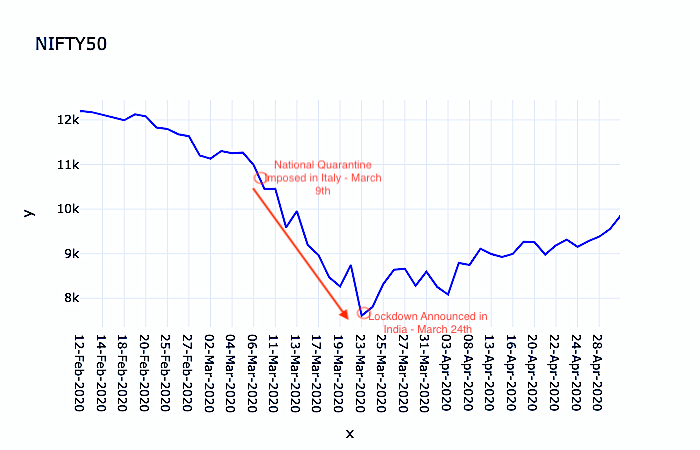

In [130]:
from IPython.display import Image
Image(filename='images/nifty50.png') 

The fall in the nifty50 seems to be out of fear in India market. When Italy imposed national quarantine, people were expecting the India government to take a step. Every day the market seemed to fall more and more almost in anticipation of lockdown 1.0 in India. Markets surprisingly start to recover after the lockdown was imposed. 

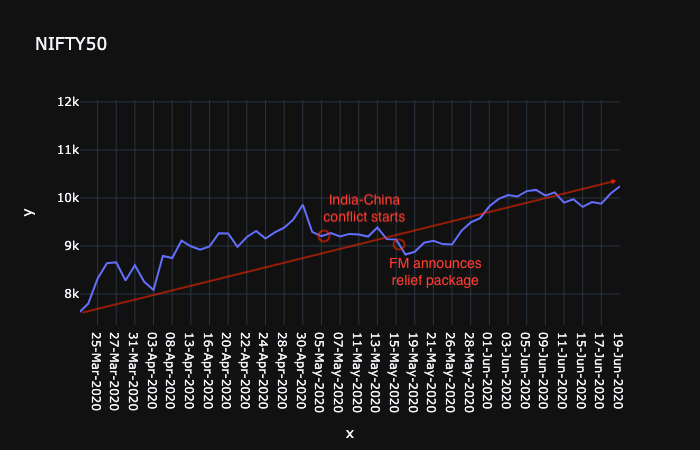

In [138]:
Image(filename='images/nifty50-part-2.png') 

We also need to analyze the VIX. 

In [153]:
vix_df = pd.read_csv("vix_india.csv", skipinitialspace=True)

In [154]:
vix_df.describe()

,Open,High,Low,Close,Prev. Close,Change,% Change
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,35.940184,37.759105,33.078474,36.081947,35.940184,0.141789,0.949789
std,17.280402,18.191965,16.314824,17.174118,17.280402,3.292391,8.439280
min,13.370000,13.672500,10.165000,13.370000,13.370000,-7.480000,-10.410000
25%,23.736250,26.315000,21.483750,24.383750,23.736250,-1.290000,-3.690000
50%,32.965000,34.355000,29.915000,32.965000,32.965000,-0.210000,-0.960000
75%,43.531250,44.731250,40.246250,43.531250,43.531250,0.780000,2.295000
max,83.607500,86.635000,75.972500,83.607500,83.607500,11.620000,30.790000


In [155]:
vix_df.head()

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,30-Jan-2020,16.4975,17.1400,15.3800,16.7975,16.4975,0.30,1.82
1,31-Jan-2020,16.7975,17.5900,14.9025,17.3675,16.7975,0.57,3.39
2,01-Feb-2020,17.3675,17.9300,16.0325,16.8350,17.3675,-0.53,-3.07
3,03-Feb-2020,16.8350,17.0300,15.4825,15.7825,16.8350,-1.05,-6.25
4,04-Feb-2020,15.7825,15.7825,14.3100,14.3800,15.7825,-1.40,-8.89


In [156]:
vix_df

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,30-Jan-2020,16.4975,17.1400,15.3800,16.7975,16.4975,0.30,1.82
1,31-Jan-2020,16.7975,17.5900,14.9025,17.3675,16.7975,0.57,3.39
2,01-Feb-2020,17.3675,17.9300,16.0325,16.8350,17.3675,-0.53,-3.07
3,03-Feb-2020,16.8350,17.0300,15.4825,15.7825,16.8350,-1.05,-6.25
4,04-Feb-2020,15.7825,15.7825,14.3100,14.3800,15.7825,-1.40,-8.89
...,...,...,...,...,...,...,...,...
90,15-Jun-2020,30.8225,33.7775,29.9150,32.5775,30.8225,1.76,5.69
91,16-Jun-2020,32.5775,35.3125,30.4075,32.9650,32.5775,0.39,1.19
92,17-Jun-2020,32.9650,34.0175,29.0500,33.3550,32.9650,0.39,1.18
93,18-Jun-2020,33.3550,33.4225,31.2175,31.4550,33.3550,-1.90,-5.70


In [254]:
fig = px.line(x=vix_df["Date "] , y=vix_df["Close "])
fig.update_xaxes(
    ticktext=["1", "2"],
    tickvals=["03-Mar-2020", "30-Mar-2020"],
)
fig.update_layout(
    yaxis=dict(title_text="VIX India"),)
fig.show()

In [256]:
fig = px.line(x=it_df1["Date"] , y=it_df1["new_deaths"])
fig.update_xaxes(
    ticktext=["1", "2"],
    tickvals=["03-Mar-2020", "30-Mar-2020"],
)
fig.update_layout(
    yaxis=dict(title_text="Daily deaths Italy"),)
fig.show()

We can see how high the vix was on March 24th, there was panic in the market and everyone wanted their money out. 

In [180]:
patient_level_df = pd.read_csv('patients_data.csv')
patient_level_df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100279,102515.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,JK,...,NaN,NaN,NaN,https://twitter.com/diprjk/status/127434387638...,NaN,NaN,NaN,NaN,73145.0,1.0
100280,102516.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Reasi,Jammu and Kashmir,JK,...,NaN,NaN,NaN,https://twitter.com/diprjk/status/127434387638...,NaN,NaN,NaN,NaN,73146.0,2.0
100281,102517.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,JK,...,NaN,NaN,NaN,https://twitter.com/diprjk/status/127434387638...,NaN,NaN,NaN,NaN,73147.0,-2.0
100282,102609.0,NaN,19/06/2020,NaN,NaN,NaN,NaN,East Sikkim,Sikkim,SK,...,NaN,NaN,NaN,https://www.eastmojo.com/coronavirus-updates/2...,NaN,NaN,NaN,NaN,73239.0,-3.0


In [209]:
pio.templates.default = "plotly_white"
clean_patient = patient_level_df["Age Bracket"].dropna()

def clean_age(x):
    if isinstance(x, float):
        return float(x)
    else:
        return 0

df1 = clean_patient.apply(lambda x : clean_age(x))

In [220]:
fig1 = px.histogram(df1,nbins=20)
fig1.update_layout(
    xaxis=dict(title_text="Age"),)
fig1.show()